<a href="https://colab.research.google.com/github/Jasn001/COMP_215/blob/main/labs/lab05_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COMP 215 - LAB 5
----------------
#### Name(s): Jasnpreet Singh
#### Date: 02/11/25

By the end of this lab you should be able to:
  * apply both a direct (ie. brute force) and heuristic algorithm to a problem
  * use the networkx module to visualize graphs
  * measure algorithm scaling


During this lab, you will be introduced to the following:
  * seeding the random module



## The Traveling Salesperson Problem

This lab is based on the famous Traveling Salesperson Problem (TSP) outlined in Section 3.3.2 of 'On Complexity'.  Imagine you needed to travel to ten different cities.  What is the sortest possible route you could take to visit every city?  For our version of the problem, you start from a specific city and must end on the same city.

In this lab, you will implement a direct (ie. brute force) and a heuristic solution to the problem.

In [5]:
# start with some imports
import random, math, time, itertools
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint

## Set up the map

For this implementation of the problem we will randomly place N cities on a 100 by 100 grid.  Cities will be labelled using a single character; 'A', 'B', 'C', etc.  City locations will be denoted by a 2-tuple, `(x,y)`, giving their position on the grid. In order to create reproducable maps, we will use [random.seed()](https://docs.python.org/3/library/random.html#random.seed) to initialize the random module.  

In [6]:
def setup_map(N, seed=1):
  ''' Returns a map of N cities with random locations on a 100 by 100 grid '''
  random.seed(seed)
  city_locations = [(random.randint(0, 100), random.randint(0, 100)) for i in range(N)]
  city_names = [chr(65 + i) for i in range(N)]
  city_map = dict(zip(city_names, city_locations))
  return city_map

def graph_map(city_map):
  ''' graph the map of cities using networkx'''
  G = nx.Graph()
  G.add_nodes_from(city_map)
  nx.draw(G, city_map, with_labels=True)

def distance(city1, city2, city_map):
  ''' Returns the distance between two cities on a map'''
  x1, y1 = city_map[city1]
  x2, y2 = city_map[city2]
  return round(math.sqrt((x2 - x1)**2 + (y2 - y1)**2),1)

def calculate_distances(city_map):
  ''' Returns a dictionary with the distances between all pairs of cities in a map '''
  distances = {}
  for city1 in city_map:
      for city2 in city_map:
          if city1 != city2:
              # this will have duplicate distances (A,B) and (B,A)
              # these duplicates make the algorithm implememntation simpler
              distances[(city1, city2)] = distance(city1, city2, city_map)
  return distances


City Map: {'A': (17, 72), 'B': (97, 8), 'C': (32, 15), 'D': (63, 97), 'E': (57, 60), 'F': (83, 48), 'G': (100, 26), 'H': (12, 62), 'I': (3, 49), 'J': (55, 77)}
Distances between cities: {('A', 'B'): 102.4, ('A', 'C'): 58.9, ('A', 'D'): 52.4, ('A', 'E'): 41.8, ('A', 'F'): 70.2, ('A', 'G'): 94.9, ('A', 'H'): 11.2, ('A', 'I'): 26.9, ('A', 'J'): 38.3, ('B', 'A'): 102.4, ('B', 'C'): 65.4, ('B', 'D'): 95.3, ('B', 'E'): 65.6, ('B', 'F'): 42.4, ('B', 'G'): 18.2, ('B', 'H'): 100.7, ('B', 'I'): 102.6, ('B', 'J'): 80.8, ('C', 'A'): 58.9, ('C', 'B'): 65.4, ('C', 'D'): 87.7, ('C', 'E'): 51.5, ('C', 'F'): 60.7, ('C', 'G'): 68.9, ('C', 'H'): 51.1, ('C', 'I'): 44.7, ('C', 'J'): 66.1, ('D', 'A'): 52.4, ('D', 'B'): 95.3, ('D', 'C'): 87.7, ('D', 'E'): 37.5, ('D', 'F'): 52.9, ('D', 'G'): 80.1, ('D', 'H'): 61.9, ('D', 'I'): 76.8, ('D', 'J'): 21.5, ('E', 'A'): 41.8, ('E', 'B'): 65.6, ('E', 'C'): 51.5, ('E', 'D'): 37.5, ('E', 'F'): 28.6, ('E', 'G'): 54.8, ('E', 'H'): 45.0, ('E', 'I'): 55.1, ('E', 'J'): 17.1,

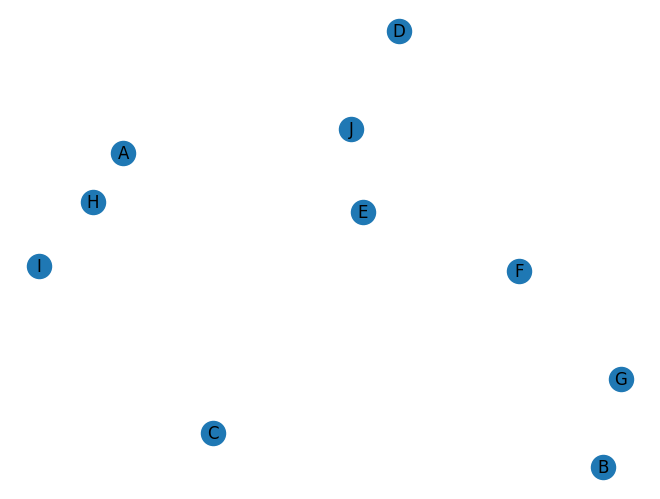

In [7]:
# test our setup functions
city_map = setup_map(10)
print(f'City Map: {city_map}')
distances = calculate_distances(city_map)
print(f'Distances between cities: {distances}')
graph_map(city_map)

### Exercise 1: The Brute Force Solution

Implement a brute force solution to the traveling salesman problem using the city map and distance dictionary given above.  The algorithm for the brute force solution looks something like this:
 1. Loop over every possible route that starts and ends on city A.  For a three city example, this would be ABCA, ACBA.  
 2. Calculate the total distance of each possible route.  
 3. Find the route with the minimum total distance.

Before you start coding, think about what functions and/or class you might want to simplify your implementation of the algorithm.  Write a small test for your algorithm.

In [8]:
def generate_routes(city_map):
    cities = list(city_map.keys())
    start_city = cities[0]  # Assume we always start from city A
    other_cities = cities[1:]  # Remaining cities

    # Generate all permutations of the other cities
    routes = [ [start_city] + list(p) + [start_city] for p in itertools.permutations(other_cities) ]
    return routes

def route_distance(route, distances):
    total_distance = 0
    for i in range(len(route) - 1):
        total_distance += distances[(route[i], route[i+1])]
    return total_distance

def brute_force_tsp(city_map, distances):
    routes = generate_routes(city_map)
    shortest_route = min(routes, key=lambda r: route_distance(r, distances))
    min_distance = route_distance(shortest_route, distances)
    return shortest_route, min_distance

# Test the algorithm
city_map = setup_map(5, seed=42)  # Small test case
pprint(city_map)
distances = calculate_distances(city_map)
shortest_route, min_distance = brute_force_tsp(city_map, distances)
print(f'Shortest Route: {shortest_route}')
print(f'Minimum Distance: {min_distance}')

{'A': (81, 14), 'B': (3, 94), 'C': (35, 31), 'D': (28, 17), 'E': (94, 13)}
Shortest Route: ['A', 'D', 'C', 'B', 'E', 'A']
Minimum Distance: 274.3


### Exercise 2: Nearest Neighbour

Implement a nearest neighbour solution to the traveling salesman problem using the city map and distance dictionary given above.  The algorithm for the nearest neighbour solution looks something like this:
 1. Start from the starting city.  
 2. Go to the nearest city that has not been visited.  
 3. Repeat steps 1 and 2 until all cities have been visited.

Before you start coding, think about what functions and/or class you might want to simplify your implementation of the algorithm.  Write a small test for your algorithm.

In [9]:
def nearest_neighbor_tsp(city_map, distances, start_city):
    '''Solve the TSP using the Nearest Neighbor heuristic.'''
    # List to keep track of the route
    route = [start_city]
    # Set to keep track of visited cities
    visited = set([start_city])

    current_city = start_city
    total_distance = 0

    # Continue until all cities have been visited
    while len(visited) < len(city_map):
        # Find the nearest unvisited city
        nearest_city = None
        nearest_distance = float('inf')

        for city in city_map:
            if city not in visited:
                dist = distances[(current_city, city)]
                if dist < nearest_distance:
                    nearest_city = city
                    nearest_distance = dist

        # Move to the nearest city
        route.append(nearest_city)
        visited.add(nearest_city)
        total_distance += nearest_distance
        current_city = nearest_city

    # Add the return to the starting city to complete the route
    total_distance += distances[(current_city, start_city)]
    route.append(start_city)

    return route, total_distance

# Test the Nearest Neighbor solution with a smaller city map
city_map_test = setup_map(4, seed=42)
distances_test = calculate_distances(city_map_test)

print(f'City Map: {city_map_test}')
print(f'Distances: {distances_test}')

# Run Nearest Neighbor TSP starting from city 'A'
start_city = 'A'
best_route, best_distance = nearest_neighbor_tsp(city_map_test, distances_test, start_city)

print(f'Best Route: {best_route}')
print(f'Best Distance: {best_distance}')


City Map: {'A': (81, 14), 'B': (3, 94), 'C': (35, 31), 'D': (28, 17)}
Distances: {('A', 'B'): 111.7, ('A', 'C'): 49.0, ('A', 'D'): 53.1, ('B', 'A'): 111.7, ('B', 'C'): 70.7, ('B', 'D'): 81.0, ('C', 'A'): 49.0, ('C', 'B'): 70.7, ('C', 'D'): 15.7, ('D', 'A'): 53.1, ('D', 'B'): 81.0, ('D', 'C'): 15.7}
Best Route: ['A', 'C', 'D', 'B', 'A']
Best Distance: 257.4


### Exercise 3: Graph the Routes

Use the networkx module to create directed graphs of the routes (brute force and nearest neighbour).  Include the distances between the cities on the edges.  Run several different map setups with a different sizes (ie. number of cities).  Do the brute force (ie. direct) and nearest neighbour (ie. heuristic) algorithms always give the same solution?  Do you notice anything about the brute force solutions that suggests an alternative heuristic algorithm?



--- Running TSP for 4 cities ---
Brute Force Best Route: ['A', 'B', 'C', 'D', 'A'], Distance: 251.2


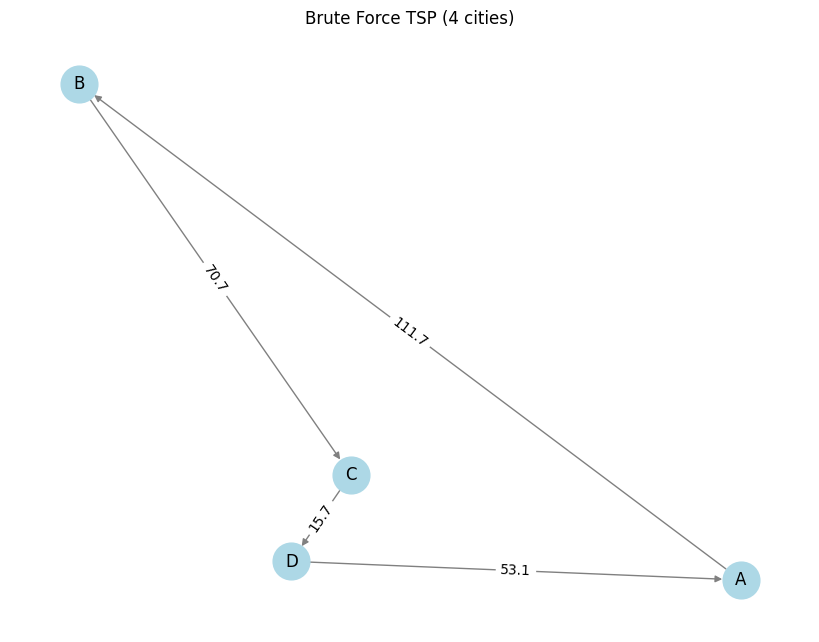

Nearest Neighbor Route: ['A', 'C', 'D', 'B', 'A'], Distance: 257.4


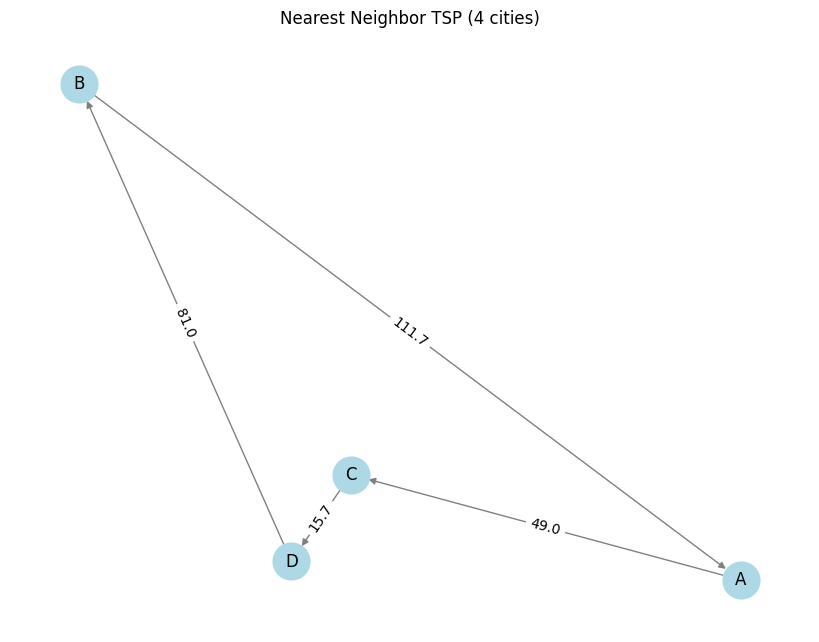

Nearest Neighbor found a suboptimal solution for 4 cities.

--- Running TSP for 5 cities ---
Brute Force Best Route: ['A', 'D', 'C', 'B', 'E', 'A'], Distance: 274.3


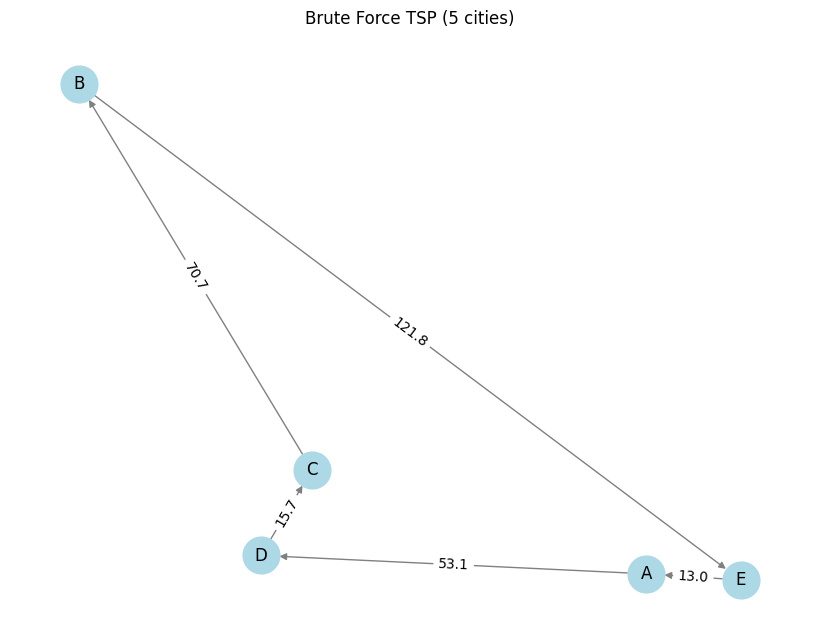

Nearest Neighbor Route: ['A', 'E', 'C', 'D', 'B', 'A'], Distance: 283.1


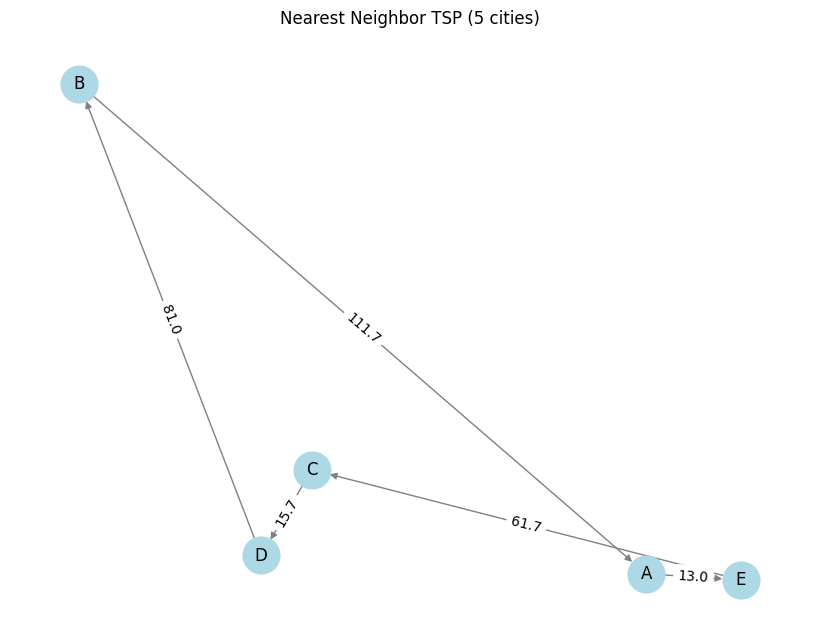

Nearest Neighbor found a suboptimal solution for 5 cities.

--- Running TSP for 7 cities ---
Brute Force Best Route: ['A', 'E', 'F', 'B', 'C', 'D', 'G', 'A'], Distance: 317.59999999999997


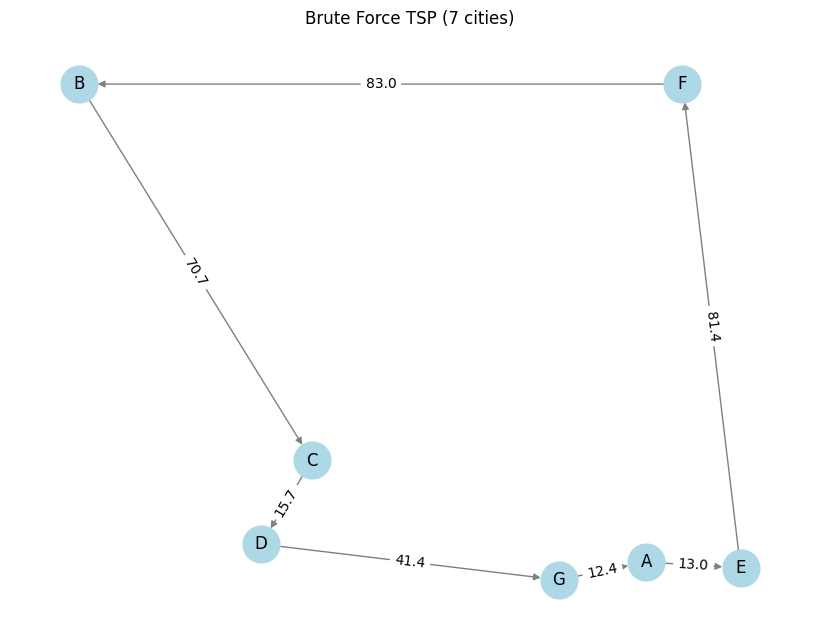

Nearest Neighbor Route: ['A', 'G', 'E', 'C', 'D', 'B', 'F', 'A'], Distance: 359.09999999999997


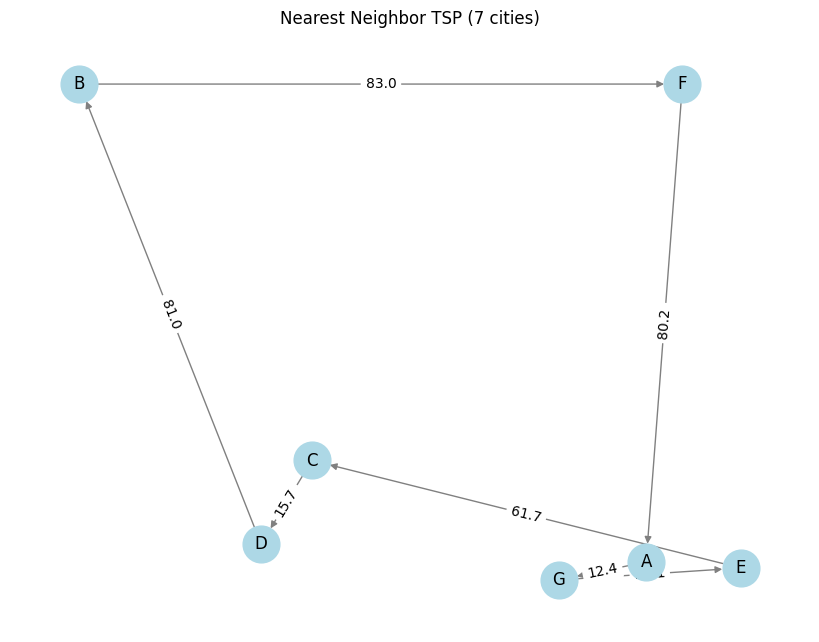

Nearest Neighbor found a suboptimal solution for 7 cities.

--- Running TSP for 10 cities ---
Brute Force Best Route: ['A', 'E', 'H', 'F', 'B', 'J', 'I', 'D', 'C', 'G', 'A'], Distance: 370.49999999999994


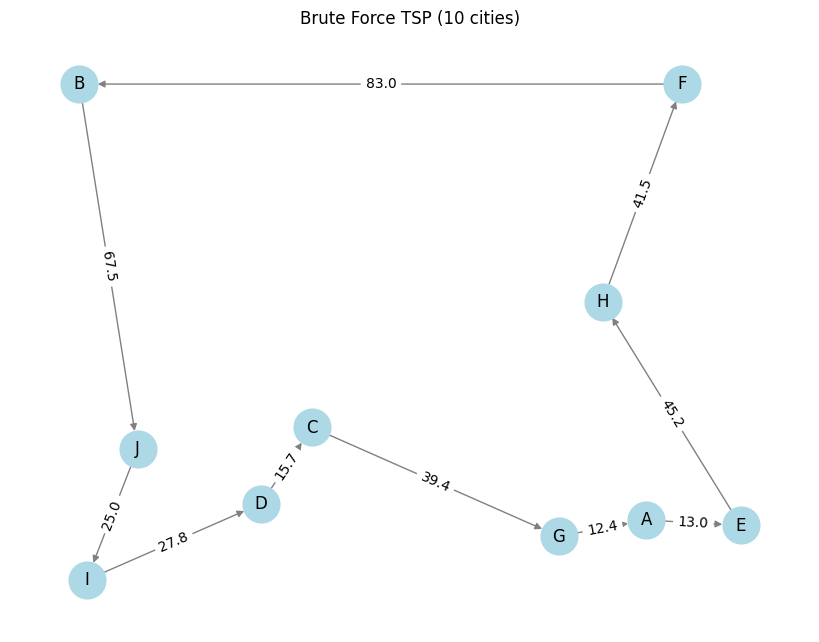

Nearest Neighbor Route: ['A', 'G', 'E', 'H', 'F', 'C', 'D', 'J', 'I', 'B', 'A'], Distance: 468.4


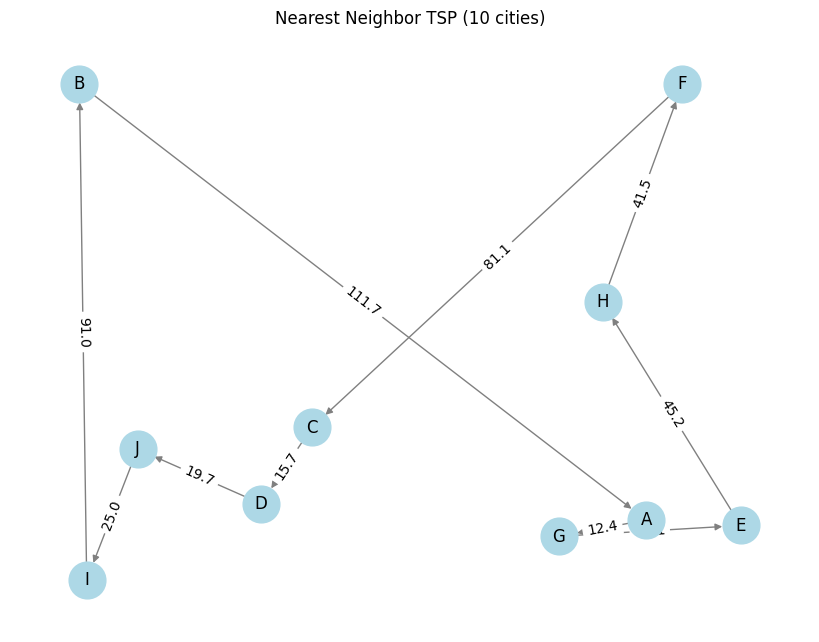

Nearest Neighbor found a suboptimal solution for 10 cities.


In [12]:
def graph_solution(city_map, route, distances, title):
    '''Visualize the TSP route using networkx.'''
    G = nx.DiGraph()
    pos = city_map

    # Add nodes
    G.add_nodes_from(city_map.keys())

    # Add edges with distances as labels
    for i in range(len(route) - 1):
        city1, city2 = route[i], route[i+1]
        G.add_edge(city1, city2, weight=distances[(city1, city2)])

    # Draw the graph
    plt.figure(figsize=(8,6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=700, font_size=12)
    labels = {(city1, city2): distances[(city1, city2)] for city1, city2 in G.edges()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=10)

    plt.title(title)
    plt.show()

# Run TSP algorithms on different map sizes
for size in [4, 5, 7, 10]:
    print(f"\n--- Running TSP for {size} cities ---")

    city_map = setup_map(size, seed=42)
    distances = calculate_distances(city_map)

    # Brute Force Solution
    bf_route, bf_distance = brute_force_tsp(city_map, distances)
    print(f"Brute Force Best Route: {bf_route}, Distance: {bf_distance}")
    graph_solution(city_map, bf_route, distances, f"Brute Force TSP ({size} cities)")

    # Nearest Neighbor Solution
    start_city = 'A'  # Starting from 'A' for consistency
    nn_route, nn_distance = nearest_neighbor_tsp(city_map, distances, start_city)
    print(f"Nearest Neighbor Route: {nn_route}, Distance: {nn_distance}")
    graph_solution(city_map, nn_route, distances, f"Nearest Neighbor TSP ({size} cities)")

    # Compare results
    if nn_distance == bf_distance:
        print(f"Nearest Neighbor found the optimal solution for {size} cities!")
    else:
        print(f"Nearest Neighbor found a suboptimal solution for {size} cities.")


### Exercise 4: Algorithm Scaling

Use the `time` module to measure the running time of the two algorithms.  Note that the `time.time()` function returns the current time, so calling it before and after the algorithm has run can give you the time it takes for the algorithm to execute.  Taking the average over several trials will make the measurement more precise.  Demonstrate the scaling nature of the algorithms by plotting their execution time as a function of N, up to about N = 10.  

N=2: Brute Force = 0.0000s, Nearest Neighbor = 0.0000s
N=3: Brute Force = 0.0000s, Nearest Neighbor = 0.0000s
N=4: Brute Force = 0.0000s, Nearest Neighbor = 0.0000s
N=5: Brute Force = 0.0000s, Nearest Neighbor = 0.0000s
N=6: Brute Force = 0.0002s, Nearest Neighbor = 0.0000s
N=7: Brute Force = 0.0029s, Nearest Neighbor = 0.0000s
N=8: Brute Force = 0.0098s, Nearest Neighbor = 0.0000s
N=9: Brute Force = 0.1247s, Nearest Neighbor = 0.0000s
N=10: Brute Force = 1.1102s, Nearest Neighbor = 0.0000s


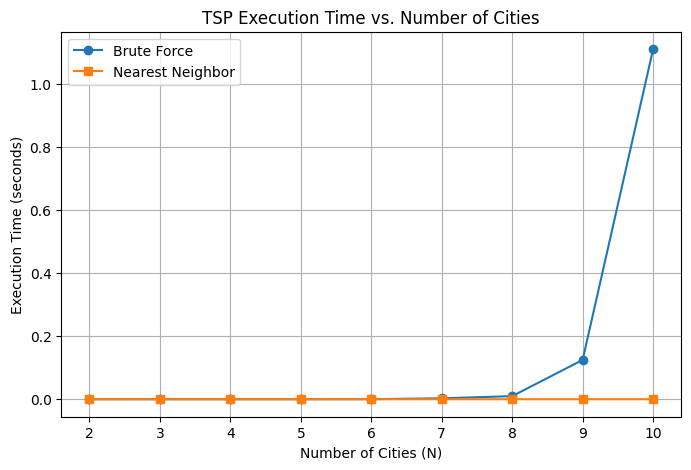

In [13]:
def measure_time(func, *args, trials=5):
    '''Measures the average execution time of a function over multiple trials'''
    times = []
    for _ in range(trials):
        start_time = time.time()
        func(*args)
        end_time = time.time()
        times.append(end_time - start_time)
    return sum(times) / trials

city_sizes = list(range(2, 11))  # N = 2 to 10 cities
bf_times, nn_times = [], []

for size in city_sizes:
    city_map = setup_map(size, seed=42)
    distances = calculate_distances(city_map)
    start_city = 'A'  # Always start from 'A' for consistency

    # Measure execution times
    bf_time = measure_time(brute_force_tsp, city_map, distances)
    nn_time = measure_time(nearest_neighbor_tsp, city_map, distances, start_city)

    # Store results
    bf_times.append(bf_time)
    nn_times.append(nn_time)

    print(f"N={size}: Brute Force = {bf_time:.4f}s, Nearest Neighbor = {nn_time:.4f}s")

# Plot execution time vs. city size
plt.figure(figsize=(8, 5))
plt.plot(city_sizes, bf_times, label="Brute Force", marker="o", linestyle="-")
plt.plot(city_sizes, nn_times, label="Nearest Neighbor", marker="s", linestyle="-")
plt.xlabel("Number of Cities (N)")
plt.ylabel("Execution Time (seconds)")
plt.title("TSP Execution Time vs. Number of Cities")
plt.legend()
plt.grid()
plt.show()
